<a href="https://colab.research.google.com/github/marisukanis/gitfirstproject/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Project 1 - Supervised Learning Regression Model 
## Used data : Weather History
1. Our target is Apparent temperature
2. We chose Temperature, Humidity and Visibility to see relations
3. Humidity outliers:
		a. When temperature is very low (around -20) and humidity is also very low (around 0)
4. NOTE: Precip type - 517 have null value, but as we are not using precip type, we didn't drop these values
		a. If temperature is high, then precip type is rain and if temperature is low (below 0), then precip type is snow
Otherwise it's not related to apparent temperature

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# read the data
df = pd.read_csv('weatherHistory.csv', parse_dates = True, index_col = 'Formatted Date')


In [ ]:
df.shape

(96453, 11)

In [ ]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [ ]:
#df = df.dropna()
#df.drop_duplicates()

df['Precip Type']= df['Precip Type'].replace([np.nan],['error'])




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [ ]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [ ]:
# removed 22 records with 0 humidity that seemed like error
df1 = df.copy()
df1.drop(df1[df1['Humidity'] == 0].index, inplace = True) 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96431 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96431 non-null  object 
 1   Precip Type               96431 non-null  object 
 2   Temperature (C)           96431 non-null  float64
 3   Apparent Temperature (C)  96431 non-null  float64
 4   Humidity                  96431 non-null  float64
 5   Wind Speed (km/h)         96431 non-null  float64
 6   Wind Bearing (degrees)    96431 non-null  float64
 7   Visibility (km)           96431 non-null  float64
 8   Loud Cover                96431 non-null  float64
 9   Pressure (millibars)      96431 non-null  float64
 10  Daily Summary             96431 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [ ]:
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000,96431.0,96431.000000
mean,11.938495,10.861527,0.735067,10.810924,187.526791,10.348166,0.0,1003.230230
std,9.544608,10.689078,0.195180,6.913451,107.376583,4.191803,0.0,116.982556
min,-21.822222,-27.716667,0.120000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.705556,2.316667,0.600000,5.828200,116.000000,8.347850,0.0,1011.900000
50%,12.005556,12.005556,0.780000,9.965900,180.000000,10.046400,0.0,1016.440000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


<function matplotlib.pyplot.show(*args, **kw)>

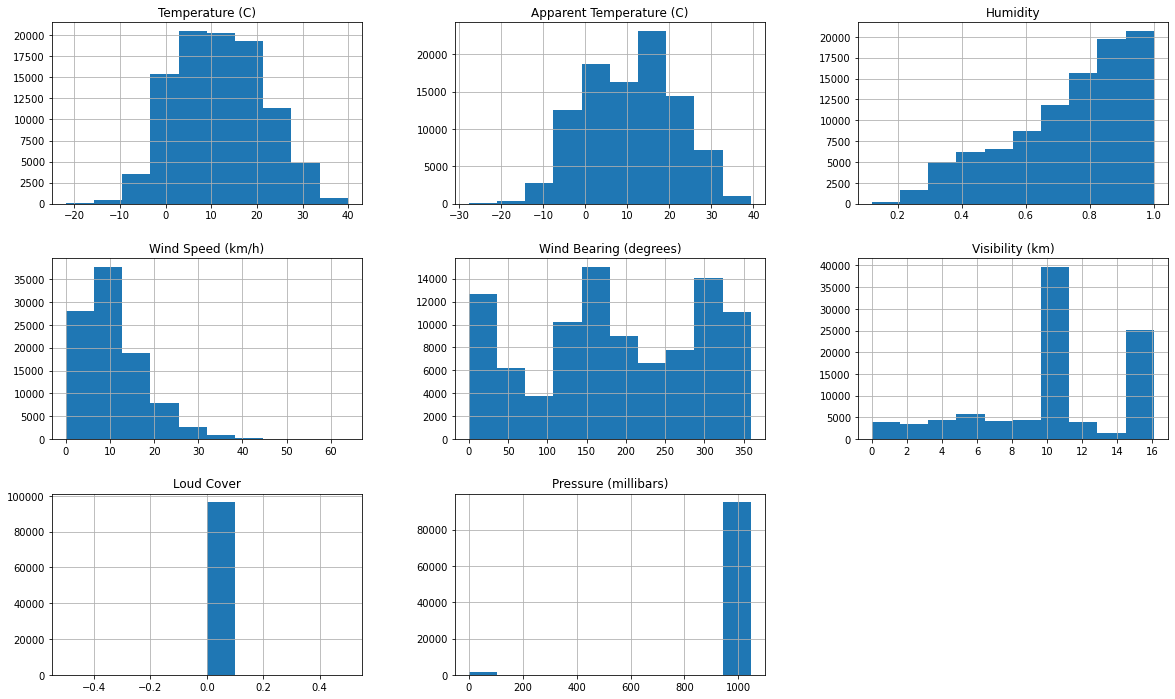

In [ ]:
df1.hist(bins=10, figsize =(20, 12))
plt.show

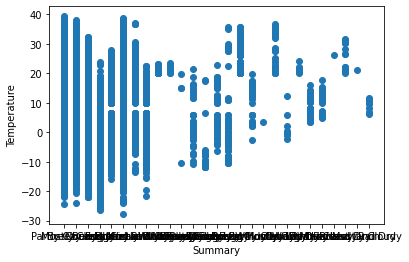

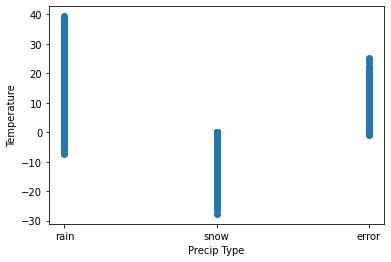

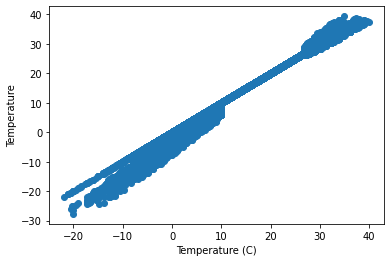

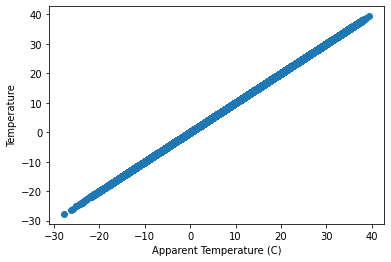

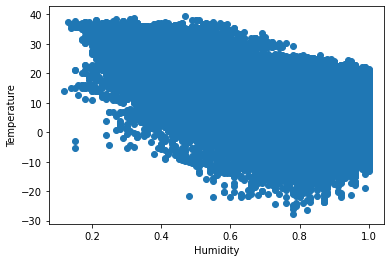

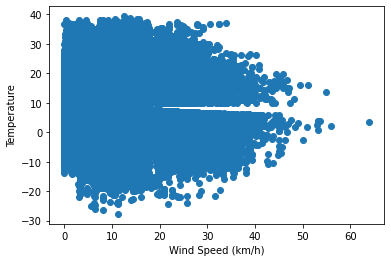

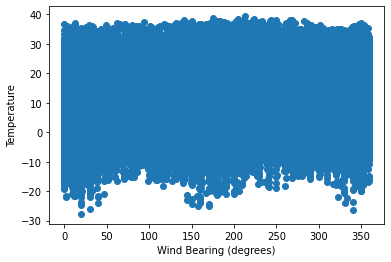

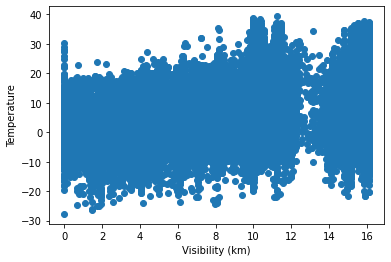

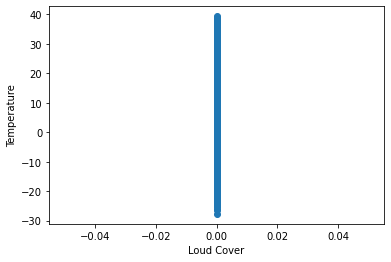

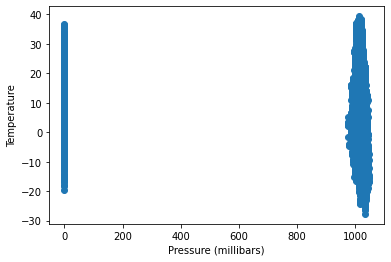

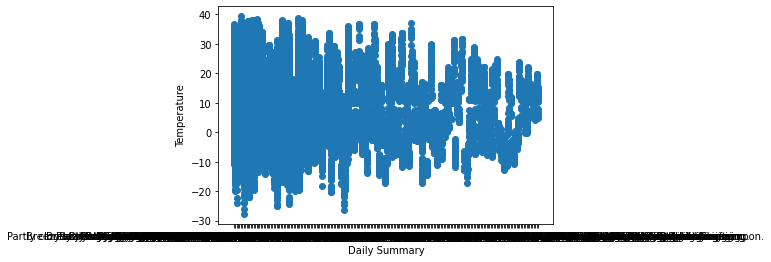

In [ ]:
for col in df1.columns:
    plt.scatter(df1[col], df1['Apparent Temperature (C)'])
    plt.xlabel(str(col))
    plt.ylabel('Temperature')
    plt.show()

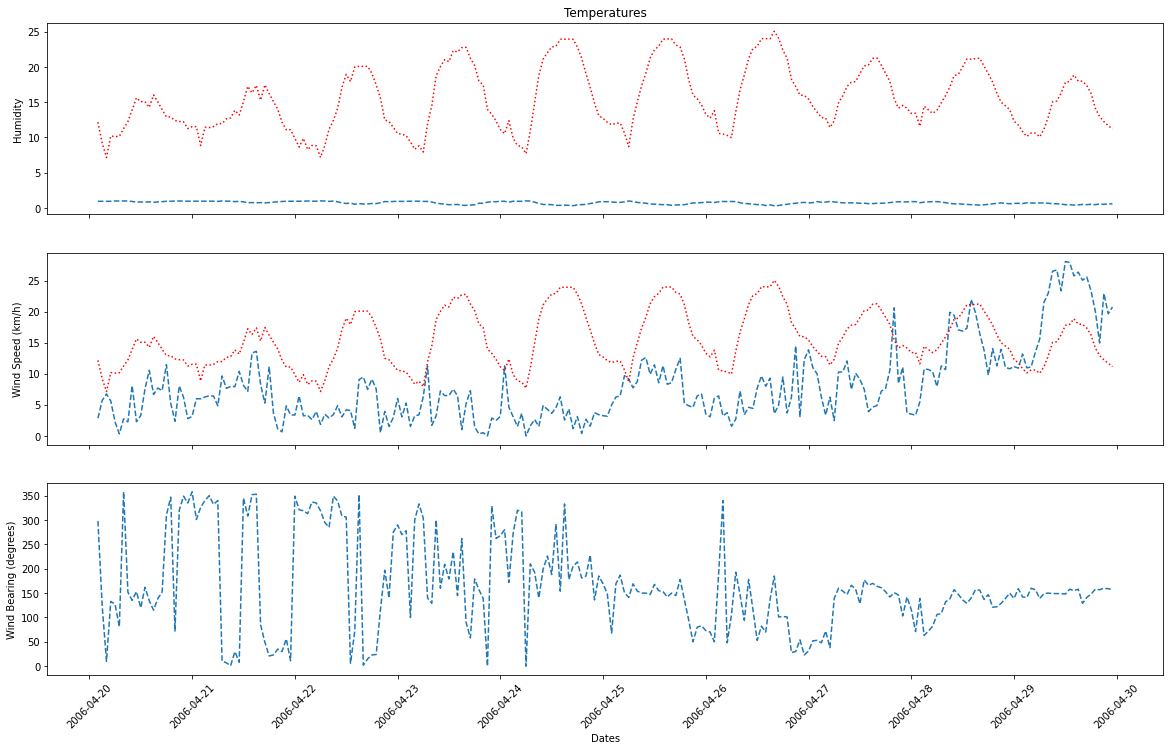

In [ ]:
# number of days/rows
n0= 290 
n = 528

# plot initiation
fig, ax = plt.subplots(3,1,sharex = True, figsize =(20, 12)) 

# data - from weather table

# line chart code - index is initated when reading the data -> parse_dates=True, index_col= 'Formatted Date'
ax[0].plot(df1.index[n0:n], df1['Humidity'][n0:n], linestyle = "--")
ax[0].plot(df1.index[n0:n], df1['Apparent Temperature (C)'][n0:n], color = 'red', linestyle = "dotted")

ax[1].plot(df1.index[n0:n], df1['Wind Speed (km/h)'][n0:n], linestyle = "--")
ax[1].plot(df1.index[n0:n], df1['Apparent Temperature (C)'][n0:n], color = 'red', linestyle = "dotted")

ax[2].plot(df1.index[n0:n], df1['Wind Bearing (degrees)'][n0:n], linestyle = "--")
#ax[2].plot(df1.index[n0:n], df1['Apparent Temperature (C)'][n0:n], color = 'red',  linestyle = "dotted")

# specify how the plot should look like
ax[2].xaxis.set_tick_params(rotation = 45) # dates are rotated
ax[0].set_title('Temperatures')
ax[0].set_ylabel('Humidity')
ax[1].set_ylabel('Wind Speed (km/h)')

ax[2].set_xlabel('Dates')
ax[2].set_ylabel('Wind Bearing (degrees)')

# display the plot
plt.show()

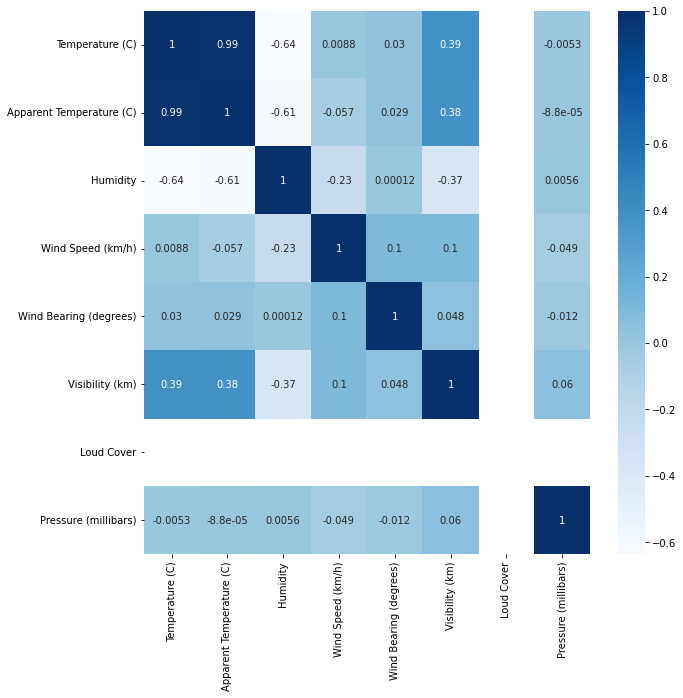

In [ ]:
# plot a correlation matrix
fig, ax = plt.subplots(figsize =(11,10))
corr = df1.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True, ax = ax)

## For our model the variables of interest would be: humidity, visibility, (temperature)

##Training and evaluating candidate models
First of all, lets split the dataset into Train and Test to have some extra data that the model was not trained on. We will use this data to check model performance

In [ ]:
# use train test split
# test_size 0.2 

#X = df1.drop('Apparent Temperature (C)', axis = 1) 
#y = df1['Apparent Temperature (C)']

X = df.drop('Apparent Temperature (C)', axis = 1) 
y = df['Apparent Temperature (C)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((77144, 10), (19287, 10), (77144,), (19287,))

##Training Models



In [ ]:
# fit the model on train dataset, without the MEDV (was already dropped earlier)
#Model 1
X_train1 = X_train[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']]
X_test1 = X_test[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']]

#Model 2
X_train2 = X_train[['Humidity', 'Visibility (km)', 'Temperature (C)']]
X_test2 = X_test[['Humidity', 'Visibility (km)', 'Temperature (C)']]

#Model 3
X_train3 = X_train[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
X_test3 = X_test[[ 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]

# Not included columns: 'Summary', 'Precip Type', 'Apparent Temperature (C)',  'Daily Summary', 'Temperature (C)',

In [ ]:
# check that corresponding regression coefficients make sense 
#Model 1
reg1 = LinearRegression()
reg1.fit(X_train1, y_train)

#Model 2 
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)

#Model 3
reg3 = LinearRegression()
reg3.fit(X_train3, y_train)

LinearRegression()

In [ ]:
# make predictions on train and test
#Model 1
y_pred_train = reg1.predict(X_train1)
y_pred_test = reg1.predict(X_test1)

#Model 2
y_pred_train2 = reg2.predict(X_train2)
y_pred_test2 = reg2.predict(X_test2)

#Model 3
y_pred_train3 = reg3.predict(X_train3)
y_pred_test3 = reg3.predict(X_test3)

In [ ]:
#Model 1, Model 2, Model 3
reg1.coef_ , reg2.coef_, reg3.coef_

(array([-3.57956610e+01, -3.23705260e-01,  4.89431761e-03]),
 array([ 2.24831474, -0.00978911,  1.14274388]),
 array([-3.20601923e+01, -3.28515251e-01,  4.05907970e-03,  4.73351835e-01,
         0.00000000e+00, -1.62254149e-03]))

Model 2: [['Humidity (values 0-1)', 'Visibility (km) (values 0-16km)', 'Temperature (C)']]
The coefficient value represents the mean change in the response given a one unit change in the predictor. 
- According to the model, if the Humidity changes 1 percentage points, then the Apparent Temp changes by 2,25 degrees.
- if the Temperature changes 1 degree, then the Apparent Temperature changes 1,143 degrees. 
- If the Visibility changes by 1 km, then the Apparent Temperature changes -0,0098 degrees.


In [ ]:
# calculate model performance metrics
#Model 1, Model 2, Model 3
r2_score(y_train, y_pred_train), r2_score(y_train, y_pred_train2), r2_score(y_train, y_pred_train3)


(0.4112835701116263, 0.9863617053060346, 0.44083038593296464)

In [ ]:
#Model 1, Model 2, Model 3
r2_score(y_test, y_pred_test), r2_score(y_test, y_pred_test2), r2_score(y_test, y_pred_test3)

(0.40301147568447304, 0.9864578047900697, 0.43163848212816747)

In [ ]:
#Model 1, Model 2, Model 3
reg1.intercept_ , reg2.intercept_, reg3.intercept_

(39.76924308838578, -4.334132483229682, 33.96280401323053)

For Model 2, if all the values (Humidity, Visibility, Temperature) are 0, then Apparent Temperature is -4,334 degrees.

## Error Metrics

In [ ]:


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


In [ ]:
# MAE (mean absolute error)
mean_absolute_error(y_test, y_pred_test) , mean_absolute_error(y_test, y_pred_test2) , mean_absolute_error(y_test, y_pred_test3) 

(6.7227740013220565, 0.9463121167452768, 6.5001084094373365)

In [ ]:
# MAPE (mean absolute percentage error)

mean_absolute_percentage_error(y_test, y_pred_test), mean_absolute_percentage_error(y_test, y_pred_test2), mean_absolute_percentage_error(y_test, y_pred_test3)

(34765905982776.316, 10563868604705.787, 31347008280182.914)

In [ ]:
# MSE (mean squared error) võtab kõik vahed ruutu ja jagab kordade arvuga
mean_squared_error(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test2), mean_squared_error(y_test, y_pred_test3)

(68.86205233526809, 1.5620791980044104, 65.55995466398046)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec = DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 5)
dec.fit(X_train2, y_train)

y_pred_tree = dec.predict(X_test2)

In [ ]:
r2_score(y_test, y_pred_tree)

0.9884373440790597

In [ ]:
y_pred_tree_train = dec.predict(X_train2)
r2_score(y_train, y_pred_tree_train)

0.9946279255607036